# 📊 Exploratory Data Analysis & Predictive Modeling: Global Cancer Patients

## 1. Descriptive Statistics
Summarize the central tendencies and distributions of key numeric variables:
- **Age**
- **Survival_Years**
- **Treatment_Cost_USD**
- Other relevant clinical or demographic features

## 2. Correlation Analysis
Investigate relationships between potential risk factors and disease severity:
- Analyze the correlations between **Genetic_Risk**, **Air_Pollution**, **Smoking**, and **Cancer_Severity**

## 3. Visualization & Temporal Trends
Identify patterns over time and across categories:
- Track changes in **Cancer_Type**, **Cancer_Stage**, and **Treatment_Cost** across different **Years**
- Use heatmaps, line plots, and stacked bar charts for clear insights

## 4. Predictive Modeling: Survival Years
Explore how lifestyle or health factors affect patient longevity:
- Predict **Survival_Years** using variables like **Obesity_Level**, **Alcohol_Use**, and **Smoking**
- Apply regression models (e.g., Linear Regression, Random Forest Regressor)

## 5. Key Risk Factor Identification
Determine the most influential features driving severity:
- Use feature importance techniques (e.g., tree-based models, SHAP values)
- Focus on predicting **Target_Severity_Score**



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"E:\General\global_cancer_patients_2015_2024.csv")

In [4]:
df.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


In [5]:
df.describe()

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,54.421540,2019.480520,5.001698,5.010126,5.010880,4.989826,4.991176,52467.298239,5.006462,4.951207
std,20.224451,2.871485,2.885773,2.888399,2.888769,2.881579,2.894504,27363.229379,2.883335,1.199677
min,20.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.050000,0.000000,0.900000
25%,37.000000,2017.000000,2.500000,2.500000,2.500000,2.500000,2.500000,28686.225000,2.500000,4.120000
50%,54.000000,2019.000000,5.000000,5.000000,5.000000,5.000000,5.000000,52474.310000,5.000000,4.950000
75%,72.000000,2022.000000,7.500000,7.500000,7.500000,7.500000,7.500000,76232.720000,7.500000,5.780000
max,89.000000,2024.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99999.840000,10.000000,9.160000


## Correlation Analysis

In [6]:
corr=df[[ "Genetic_Risk", "Air_Pollution", "Smoking", "Target_Severity_Score"]].corr()
corr

,Genetic_Risk,Air_Pollution,Smoking,Target_Severity_Score
Genetic_Risk,1.000000,-0.004492,-0.003718,0.478700
Air_Pollution,-0.004492,1.000000,0.003549,0.366963
Smoking,-0.003718,0.003549,1.000000,0.484420
Target_Severity_Score,0.478700,0.366963,0.484420,1.000000


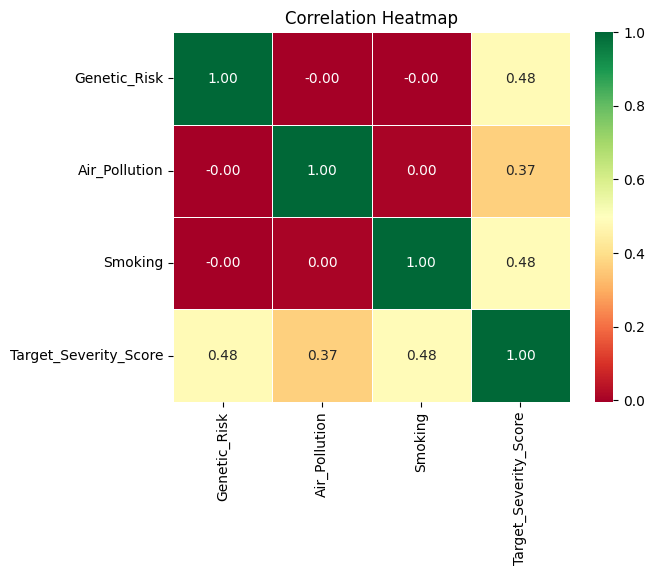

In [7]:
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdYlGn", linewidths=0.5)

# Add a title for context
plt.title("Correlation Heatmap")

# Show the plot
plt.show()

In [ ]:
## Distribution of Cancer Types

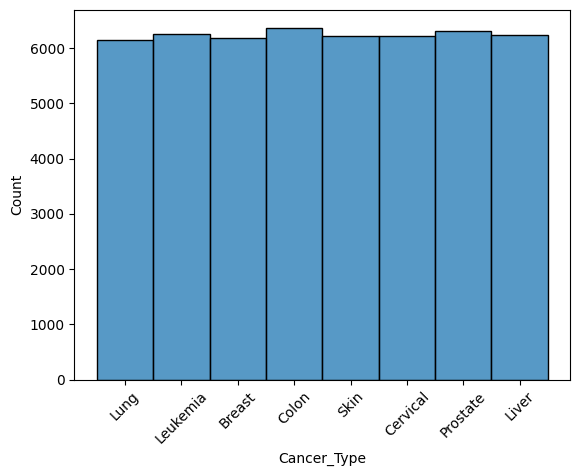

In [8]:
sns.histplot(data=df["Cancer_Type"], bins=100)
plt.xticks(rotation=45)
plt.show()

In [9]:
max_patient = df["Country_Region"].value_counts(ascending=True)
print(max_patient)

Country_Region
Canada       4864
China        4913
Pakistan     4926
Brazil       5004
Russia       5017
Germany      5024
India        5040
UK           5060
USA          5060
Australia    5092
Name: count, dtype: int64


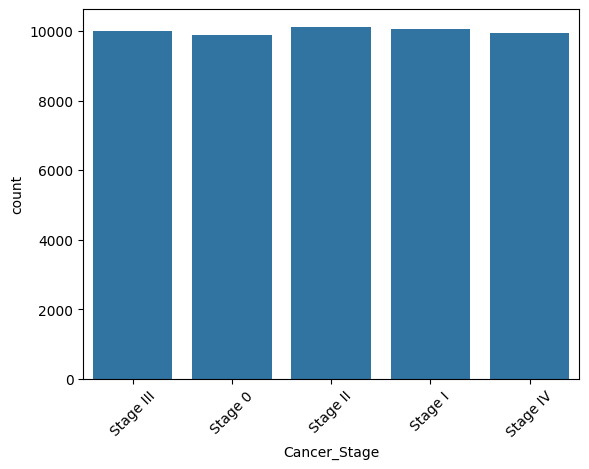

In [10]:
sns.countplot(x=df["Cancer_Stage"])
plt.xticks(rotation=45)
plt.show()

## Cost Analysis

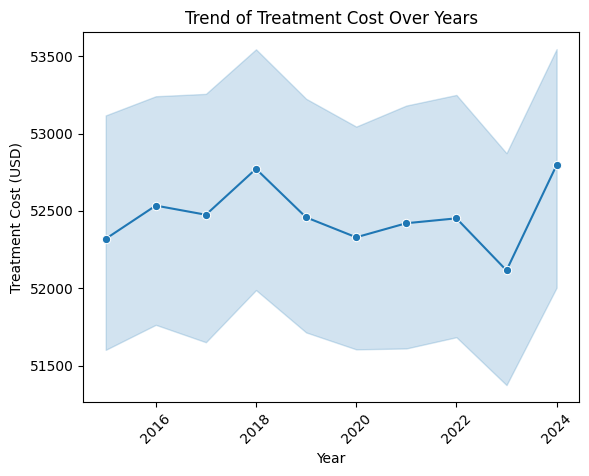

In [11]:
sns.lineplot(data=df, x="Year", y="Treatment_Cost_USD", marker="o")

plt.xticks(rotation=45)

plt.title("Trend of Treatment Cost Over Years")
plt.xlabel("Year")
plt.ylabel("Treatment Cost (USD)")

# Show the plot
plt.show()

## Correlation Analysis

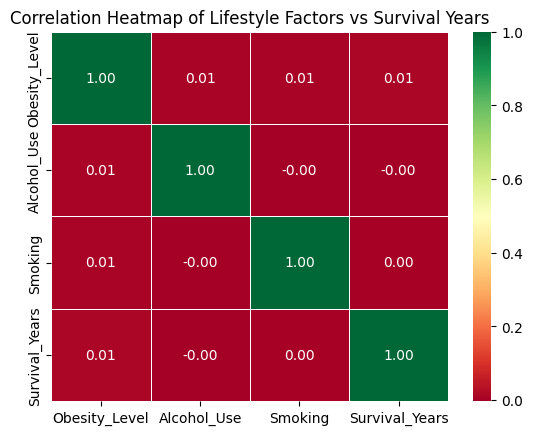

In [12]:
corr = df[["Obesity_Level", "Alcohol_Use", "Smoking", "Survival_Years"]].corr()

# Create the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdYlGn", linewidths=0.5)

# Title
plt.title("Correlation Heatmap of Lifestyle Factors vs Survival Years")

# Show the plot
plt.show()

## Predictive Model (Survival Years)

In [13]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Prepare features and target variable
X = df[["Obesity_Level", "Alcohol_Use", "Smoking"]]
y = df["Survival_Years"]

# Train linear regression model
model = LinearRegression()
model.fit(X, y)

print("Feature Coefficients:", model.coef_)

X_new = pd.DataFrame({
    "Obesity_Level": [3, 2],  # Example levels
    "Alcohol_Use": [1, 0],
    "Smoking": [1, 0]
})

predictions = model.predict(X_new)
print("Predicted Survival Years:", predictions)


Feature Coefficients: [ 0.00973018 -0.00059501  0.00131316]
Predicted Survival Years: [4.98423471 4.97378637]


## Predictive Model (Target Severity Scores)

In [14]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

features = ["Age", "Genetic_Risk", "Air_Pollution", "Alcohol_Use", "Smoking", "Obesity_Level", "Treatment_Cost_USD", "Survival_Years"]
X = df[features]
y = df["Target_Severity_Score"]

model = RandomForestRegressor()
model.fit(X, y)

importances = model.feature_importances_
importance_df = pd.DataFrame({"Feature": features, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)
print("Feature Importances:\n", importance_df)

X_new = pd.DataFrame({
    "Age": [45, 60],
    "Genetic_Risk": [2, 3],
    "Air_Pollution": [80, 65],
    "Alcohol_Use": [1, 0],
    "Smoking": [1, 0],
    "Obesity_Level": [3, 2],
    "Treatment_Cost_USD": [15000, 12000],
    "Survival_Years": [5, 8]
})

predictions = model.predict(X_new)
print("Predicted Target Severity Scores:", predictions)

Feature Importances:
               Feature  Importance
4             Smoking    0.233258
1        Genetic_Risk    0.229226
6  Treatment_Cost_USD    0.214410
3         Alcohol_Use    0.130004
2       Air_Pollution    0.128410
5       Obesity_Level    0.058333
7      Survival_Years    0.003226
0                 Age    0.003133
Predicted Target Severity Scores: [4.096  4.2336]
